In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 400) 

In [26]:
train_data=pd.read_csv("./TrainingData.csv")
test_data=pd.read_csv("./SubtaskA_Trial_Test_Labeled.csv")
valid_data=pd.read_csv("./SubtaskA_EvaluationData_labeled.csv")

In [27]:
print(train_data.shape)
train_data.head()

(8500, 3)


,id,sentence,label
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0


In [19]:
print(test_data.shape)
test_data.head()

(592, 3)


,id,sentence,label
0,1310_1,"I'm not asking Microsoft to Gives permission like Android so any app can take my data, but don't keep it restricted like iPhone.",1
1,1312_1,somewhere between Android and iPhone.,0
2,1313_1,And in the Windows Store you can flag the App [Requires Trust] for example.,0
3,1313_2,"Many thanks Sameh Hi, As we know, there is a lot of limitations is WP8 OS due the high security in the OS itself which is very good, but some time we need to allow some apps to do extra works, apps which we trust i.e: hotmail app, facebook app, skype app ....",0
4,1313_3,"The idea is that we can develop a regular app and we request our permissions in the manifest, OR the app can ASK FOR TRUST_�_ more",1


In [20]:
print(valid_data.shape)
valid_data.head()

(833, 3)


,id,sentence,label
0,9566,This would enable live traffic aware apps.,0
1,9569,Please try other formatting like bold italics shadow to distinguish titles/subtitles from content.,1
2,9576,Since computers were invented to save time I suggest we be allowed to upload them all in one zip file - using numbering for the file names and the portal could place them in the right order.,1
3,9577,Allow rearranging if the user wants to change them!,1
4,9579,Add SIMD instructions for better use of ARM NEON instructions for math and games.,1


In [22]:
len_train= train_data['sentence'].str.len()
print(len_train)

0       268
1       282
2       108
3        68
4        72
       ... 
8495     67
8496    111
8497    110
8498    179
8499    186
Name: sentence, Length: 8500, dtype: int64


In [29]:
combined= train_data.append(test_data,ignore_index=True)
combined= combined.append(valid_data,ignore_index=True)
print(combined.shape)
combined.head()

(9925, 3)


,id,sentence,label
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0


In [30]:
combined['clean']=combined['sentence'].str.replace("[^a-zA-Z#]"," ")
combined.head()

,id,sentence,label,clean
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1,Please enable removing language code from the Dev Center language history For example if you ever selected ru and ru ru laguages and you published this xap to the Store then it causes Tile localization to show the en us default tile localization which is bad
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0,Note in your csproj file there is a SupportedCultures entry like this SupportedCultures de DE ru ru RU SupportedCultures When I removed the ru language code and published my new xap version the old xap version still remains in the Store with Replaced and unpublished
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0,Wich means the new version not fully replaced the old version and this causes me very serious problems
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0,Some of my users will still receive the old xap version of my app
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0,The store randomly gives the old xap or the new xap version of my app


In [31]:
combined['clean'] = combined['clean'].apply(lambda sentence: ' '.join([w for w in sentence.split() if len(w)>3]))
combined.head()

,id,sentence,label,clean
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1,Please enable removing language code from Center language history example ever selected laguages published this Store then causes Tile localization show default tile localization which
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0,Note your csproj file there SupportedCultures entry like this SupportedCultures SupportedCultures When removed language code published version version still remains Store with Replaced unpublished
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0,Wich means version fully replaced version this causes very serious problems
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0,Some users will still receive version
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0,store randomly gives version


In [32]:
tokenized_sentence= combined['clean'].apply(lambda x: x.split())
tokenized_sentence.head()

0               [Please, enable, removing, language, code, from, Center, language, history, example, ever, selected, laguages, published, this, Store, then, causes, Tile, localization, show, default, tile, localization, which]
1    [Note, your, csproj, file, there, SupportedCultures, entry, like, this, SupportedCultures, SupportedCultures, When, removed, language, code, published, version, version, still, remains, Store, with, Replaced, unpublished]
2                                                                                                                                          [Wich, means, version, fully, replaced, version, this, causes, very, serious, problems]
3                                                                                                                                                                                     [Some, users, will, still, receive, version]
4                                                                                           

In [33]:
from nltk.stem.porter import *
stemmer =  PorterStemmer()
tokenized_sentence = tokenized_sentence.apply(lambda x: [stemmer.stem(i) for i in x] )
tokenized_sentence.head()

0                             [pleas, enabl, remov, languag, code, from, center, languag, histori, exampl, ever, select, laguag, publish, thi, store, then, caus, tile, local, show, default, tile, local, which]
1    [note, your, csproj, file, there, supportedcultur, entri, like, thi, supportedcultur, supportedcultur, when, remov, languag, code, publish, version, version, still, remain, store, with, replac, unpublish]
2                                                                                                                                 [wich, mean, version, fulli, replac, version, thi, caus, veri, seriou, problem]
3                                                                                                                                                                      [some, user, will, still, receiv, version]
4                                                                                                                                                               

In [35]:
detokenized_sentence= tokenized_sentence.apply(lambda x: ' '.join(x))
detokenized_sentence.head()

0                              pleas enabl remov languag code from center languag histori exampl ever select laguag publish thi store then caus tile local show default tile local which
1    note your csproj file there supportedcultur entri like thi supportedcultur supportedcultur when remov languag code publish version version still remain store with replac unpublish
2                                                                                                                    wich mean version fulli replac version thi caus veri seriou problem
3                                                                                                                                                    some user will still receiv version
4                                                                                                                                                            store randomli give version
Name: clean, dtype: object

In [36]:
combined['clean']=detokenized_sentence
combined.head()

,id,sentence,label,clean
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1,pleas enabl remov languag code from center languag histori exampl ever select laguag publish thi store then caus tile local show default tile local which
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0,note your csproj file there supportedcultur entri like thi supportedcultur supportedcultur when remov languag code publish version version still remain store with replac unpublish
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0,wich mean version fulli replac version thi caus veri seriou problem
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0,some user will still receiv version
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0,store randomli give version


In [37]:
combined.to_csv('CleanData.csv', encoding='utf-8', index=False)

In [39]:
# VISUALIZING THE TWEETS
from wordcloud import WordCloud
def generateImage(words):
    wordcloud = WordCloud(width=1200,height=500,random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

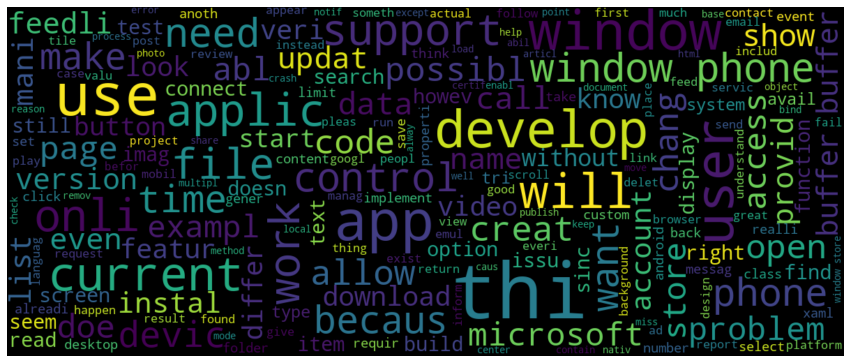

In [40]:
normal_words=' '.join([text for text in combined['clean'][combined['label']==0]])
generateImage(normal_words)

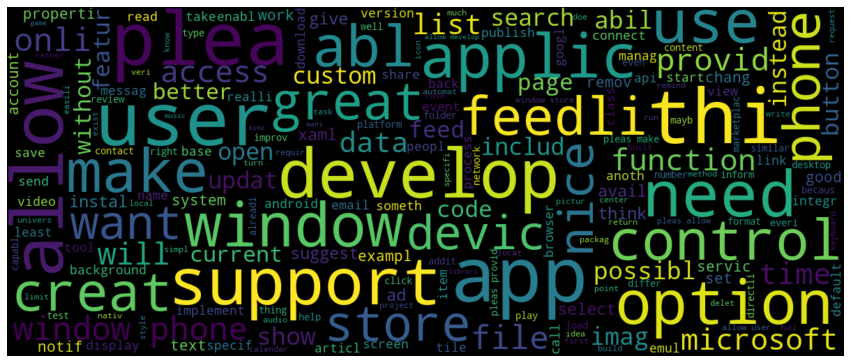

In [42]:
suggestion_words=' '.join([text for text in combined['clean'][combined['label']==1]])
generateImage(suggestion_words)